In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def show_in_notebook(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

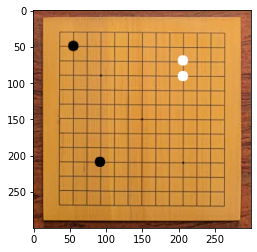

In [2]:
img = cv2.imread('../img/step/step4.png')
show_in_notebook(img)

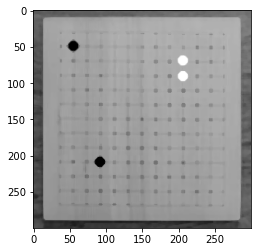

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)

show_in_notebook(gray)

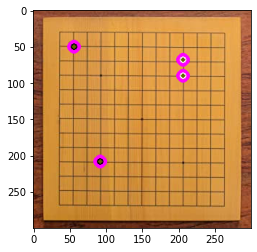

In [5]:
rows = gray.shape[0]
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 26,
                           param1=100, param2=10,
                           minRadius=4, maxRadius=10)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(img, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img, center, radius, (255, 0, 255), 3)
show_in_notebook(img)

In [7]:
for i in circles[0, :]:
    print(i[0], i[1])

206 90
206 68
56 50
92 208


In [20]:
mean_row = [8, 29, 49, 68, 88, 108, 128, 148, 167, 186, 206, 226, 246]
mean_col = [8, 27, 47, 66, 84, 103, 122, 141, 160, 179, 197, 216, 235]

stone_map = np.zeros((13, 13))

for circle in circles[0, :]:
    r = 6

    row_val = circle[0]
    col_val = circle[1]

    row_index = -1
    col_index = -1


    for i in range(len(mean_row)):
        if abs(row_val - mean_row[i]) <= 8:
            row_index = i
            break
    for i in range(len(mean_col)):
        if abs(col_val - mean_col[i]) <= 8:
            col_index = i
            break

    roi = img[row_val - r: row_val + r, col_val - r: col_val + r]
    width, height = roi.shape[:2]
    mask = np.zeros((width, height, 3), roi.dtype)
    cv2.circle(mask, (int(width / 2), int(height / 2)), r, (255, 255, 255), -1)
    dst = cv2.bitwise_and(roi, mask)
    data = []
    for k in range(3):
        channel = dst[:, :, k]
        indices = np.where(channel != 0)[0]
        color = np.mean(channel[indices])
        data.append(int(color))
    if sum(data)/len(data) < 50:
        stone_map[row_index, col_index] = 1
    elif sum(data)/len(data) > 200:
        stone_map[row_index, col_index] = 2

KeyboardInterrupt: 